In [28]:
import pandas as pd
import numpy as np

import pickle

import matplotlib.pyplot as plt
import matplotlib as mpl

# Загрузим тексты всех обращений

In [13]:
with open('..\\data\\raw\\dataset_link_data.pickle', 'rb') as f:
        dataset = pickle.load(f)

In [14]:
dataset

,link,data,file_name
0,http://kremlin.ru/events/president/transcripts...,2020-01-15,62582
1,http://kremlin.ru/events/president/transcripts...,2019-02-20,59863
2,http://kremlin.ru/events/president/transcripts...,2018-03-01,56957
3,http://kremlin.ru/events/president/transcripts...,2016-12-01,53379
4,http://kremlin.ru/events/president/transcripts...,2015-12-03,50864
5,http://kremlin.ru/events/president/transcripts...,2014-12-04,47173
6,http://kremlin.ru/events/president/transcripts...,2013-12-12,19825
7,http://kremlin.ru/events/president/transcripts...,2012-12-12,17118
8,http://kremlin.ru/events/president/transcripts...,2011-12-22,14088
9,http://kremlin.ru/events/president/transcripts...,2010-11-30,9637


In [17]:
message_content = []
for name in dataset['file_name']:
    f = open("..\\data\\raw\\" + name + ".txt", "r")
    if f.mode == 'r':
        contents = f.read()
    contents = contents.replace('\n\n',' ')
    message_content.append(contents)

In [18]:
dataset['message_content'] = message_content

In [19]:
dataset

,link,data,file_name,message_content
0,http://kremlin.ru/events/president/transcripts...,2020-01-15,62582,Уважаемые члены Совета Федерации и депутаты Го...
1,http://kremlin.ru/events/president/transcripts...,2019-02-20,59863,Уважаемые члены Совета Федерации! Уважаемые де...
2,http://kremlin.ru/events/president/transcripts...,2018-03-01,56957,Уважаемые граждане России! Уважаемые члены Сов...
3,http://kremlin.ru/events/president/transcripts...,2016-12-01,53379,"Добрый день, уважаемые коллеги! Уважаемые член..."
4,http://kremlin.ru/events/president/transcripts...,2015-12-03,50864,Уважаемые члены Совета Федерации! Уважаемые де...
5,http://kremlin.ru/events/president/transcripts...,2014-12-04,47173,Уважаемые члены Совета Федерации! Депутаты Гос...
6,http://kremlin.ru/events/president/transcripts...,2013-12-12,19825,Уважаемые граждане России! Уважаемые члены Сов...
7,http://kremlin.ru/events/president/transcripts...,2012-12-12,17118,Уважаемые граждане России! Уважаемые члены Сов...
8,http://kremlin.ru/events/president/transcripts...,2011-12-22,14088,Уважаемые граждане России! Уважаемые депутаты ...
9,http://kremlin.ru/events/president/transcripts...,2010-11-30,9637,Уважаемые граждане России! Уважаемые депутаты ...


In [20]:
with open('..\\data\\interim\\dataset.pickle', 'wb') as f:
        pickle.dump(dataset, f)

# Посмотрим на длину каждого обращения

In [30]:
message_len = []
for message in dataset['message_content']:
    message_len.append(len(message))

In [31]:
message_len

[55672,
 71680,
 95192,
 57344,
 49159,
 52255,
 60321,
 71657,
 51447,
 54726,
 76503,
 65687]

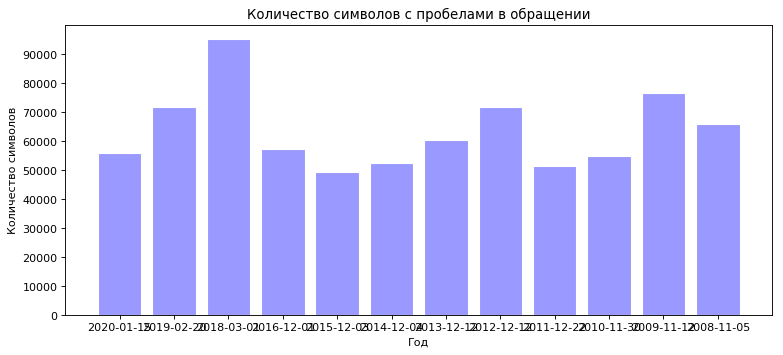

In [34]:
dpi = 80
fig = plt.figure(dpi = dpi, figsize = (912 / dpi, 384 / dpi) )
mpl.rcParams.update({'font.size': 10})

plt.axis([0, 10, -1.5, 1.5])

plt.title('Количество символов с пробелами в обращении')
plt.xlabel('Год')
plt.ylabel('Количество символов')

X = np.arange(12)
Y = message_len

plt.bar(X, Y, facecolor='#9999ff', edgecolor='white')
plt.xticks(X, dataset['data'])

ax = plt.axes()
ax.set_yticks(np.arange(0, 100000, 10000))

plt.xlim(X.min()-1, X.max()+1)
plt.ylim(0, 100000)

plt.show()

fig.savefig('..\\reports\\figures\\characters_num.png')